# Variations in z-direction

*This notebook explores the variations in z-direction.*

Recall that each build contains eight 'anchors', i.e. specimen **not** included in the main study. These anchors are specimen rotated -90 degrees about the x-axis. All builds contain 45 defined positions in a 3x3x5 grid as displayed in the figure below. The anchors are found at **(2,3,z)** for all layers, and at **(3,1,z)** for layers 1, 3 and 5.


<img src="figs/layout_positions.png" width="600"/>

In [2]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [3]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [4]:
# Import libraries

import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

import my_functions as func

In [5]:
"""
Retrieve all the data and sort it into a dictionary where each entry is a separate characteristic.

Key:   Name of the characteristic.
Value: DataFrame containing the measured values and the layout data.

"""

# Initiate a dictionary with characteristics and layout information
char_dict = func.make_dict(func.load_results(), func.load_layout())

## Cylindricity

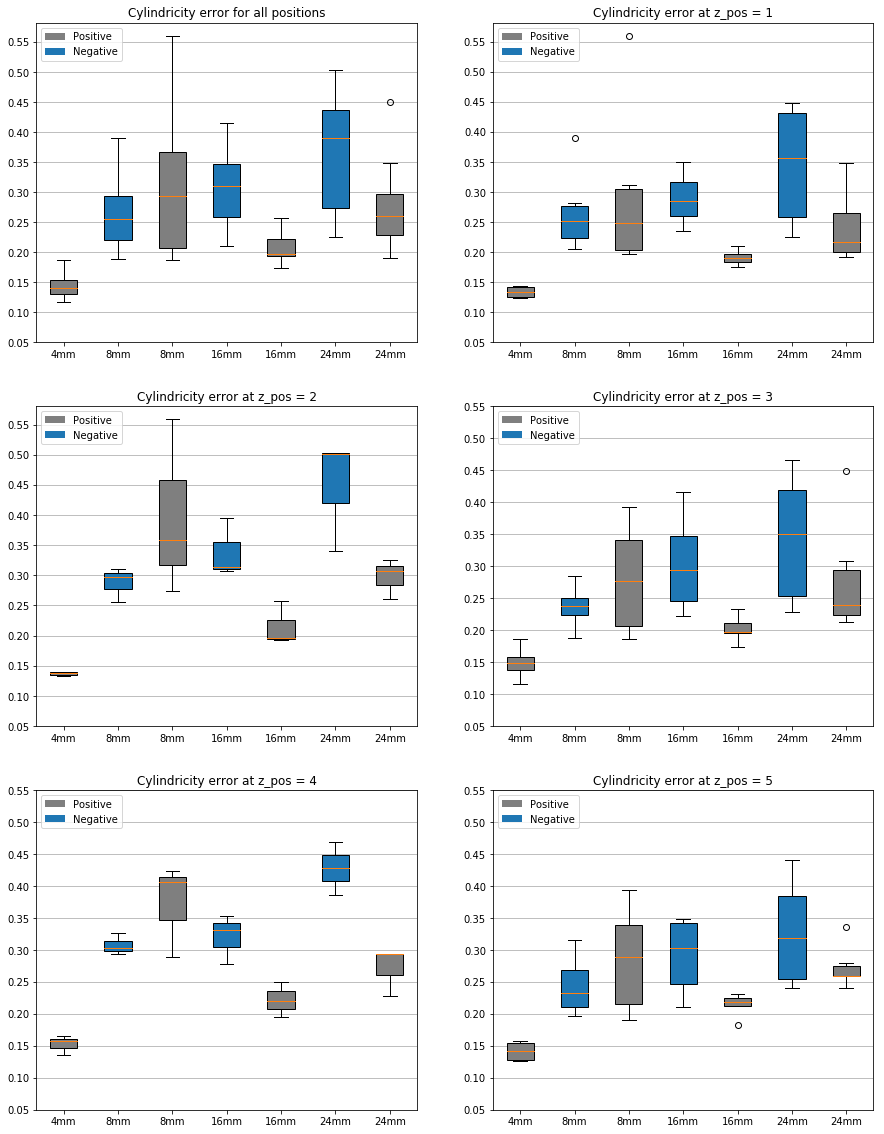

In [11]:
"""
Boxplots showing the variation in cylindricity of different dimension cylinders with respect to the z-height.

Only consider the 'reference specimen' rotated -90 degrees.

"""

# List of characteristics
chars = ['Cylindricity_Cyl_4mm_Pos',\
        'Cylindricity_Cyl_8mm_Neg',\
        'Cylindricity_Cyl_8mm_Pos',\
        'Cylindricity_Cyl_16mm-Neg',\
        'Cylindricity_Cyl_16mm_Pos',\
        'Cylindricity_Cyl_24mm_Neg',\
        'Cylindricity_Cyl_24mm_Pos']

# List of lables for the boxplots
labels = ['4mm', '8mm', '8mm', '16mm', '16mm', '24mm', '24mm']

# Define colors
color1, color2 = 'tab:gray', 'tab:blue'

# Assign colors to boxes
colors = [color1, color2, color1, color2, color1, color2, color1]

# Define legend elements
legend_elements = [Patch(facecolor=color1, label='Positive'),\
                  Patch(facecolor=color2, label='Negative')]

# list of handles to the boxes
bplots = []

# Retrieve the characteristics from the dictionary
dfs = func.df_from_dict(chars, char_dict)

# Isolate the specimen rotated -90 degrees
dfs = func.get_single_values('angle', -90, dfs)

# First element of data-list contains all error values
data = [func.get_column('error', dfs)]

# Append to the data-list the z-layers one-by-one
for i in range(1,6):
    data.append(func.get_column('error', func.get_single_values('z_pos', i, dfs)))

# Initialize figure as a grid of plots
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(15, 20))

# Construct each plot
for i in range(3):
    for j in range(2):
        bplots.append(axs[i, j].boxplot(data[(i*2)+j], patch_artist=True, labels=labels))
        axs[i, j].set_title("Cylindricity error at z_pos = {}".format((i*2)+j))
        axs[i, j].legend(handles=legend_elements, loc='upper left')
        axs[i, j].set_yticks([0.05, .1, .15, .2, .25, .3, .35, .4, .45, .5, .55])
        axs[i, j].yaxis.grid(True)

# Set color to the boxplots
for bplot in bplots:
    for patch, color in zip(bplot['boxes'], colors):
        patch.set_facecolor(color)

# Revise title of first plot
axs[0, 0].set_title("Cylindricity error for all positions")

# Display figure
plt.show()

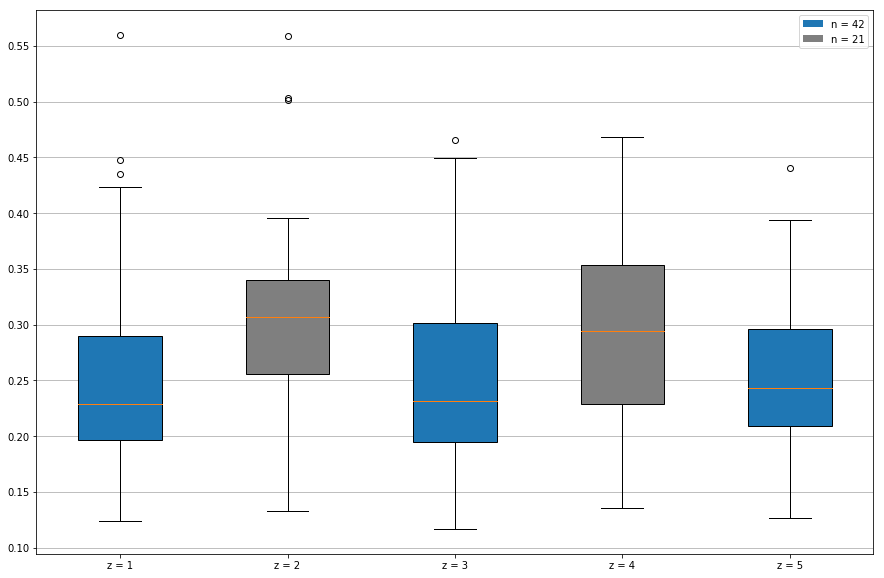

In [73]:
"""
Boxplots showing the variation in cylindricity of all cylinders with respect to z-height.

Only consider the 'reference specimen' rotated -90 degrees.

"""

# List of characteristics
chars = ['Cylindricity_Cyl_4mm_Pos',\
        'Cylindricity_Cyl_8mm_Neg',\
        'Cylindricity_Cyl_8mm_Pos',\
        'Cylindricity_Cyl_16mm-Neg',\
        'Cylindricity_Cyl_16mm_Pos',\
        'Cylindricity_Cyl_24mm_Neg',\
        'Cylindricity_Cyl_24mm_Pos']

# List of lables for the boxplots
labels = ['z = 1', 'z = 2', 'z = 3', 'z = 4', 'z = 5']

# Define colors
color1, color2 = 'tab:blue', 'tab:gray'

# Assign colors to boxes
colors = [color1, color2, color1, color2, color1]

# Define legend elements
legend_elements = [Patch(facecolor=color1, label='n = {}'.format(len(chars)*2*3)),\
                  Patch(facecolor=color2, label='n = {}'.format(len(chars)*3))]

# list of handles to the boxes
bplots = []

# Retrieve the characteristics from the dictionary
dfs = func.df_from_dict(chars, char_dict)

# Isolate the specimen rotated -90 degrees
dfs = func.get_single_values('angle', -90, dfs)

# Concatenate dataframes
dfs = pd.concat(dfs)

# Extract columns of interest
dfs = dfs[['error', 'z_pos']]

# Initiate empty list
data = [None] * 5

# Extract the z-layers into separate DataFrame-objects in the list 'data'
for i in range(5):
    data[i] = dfs[dfs['z_pos'] == i+1]
    data[i] = data[i]['error']
    
# Initialize figure
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 10))

bplots = [ax.boxplot(data, patch_artist=True, labels=labels)]
ax.set_yticks([.1, .15, .2, .25, .3, .35, .4, .45, .5, .55])
ax.yaxis.grid(True)
ax.legend(handles=legend_elements, loc='upper right')

# Set color to the boxplots
for bplot in bplots:
    for patch, color in zip(bplot['boxes'], colors):
        patch.set_facecolor(color)

# Display figure
plt.show()

## Diameter

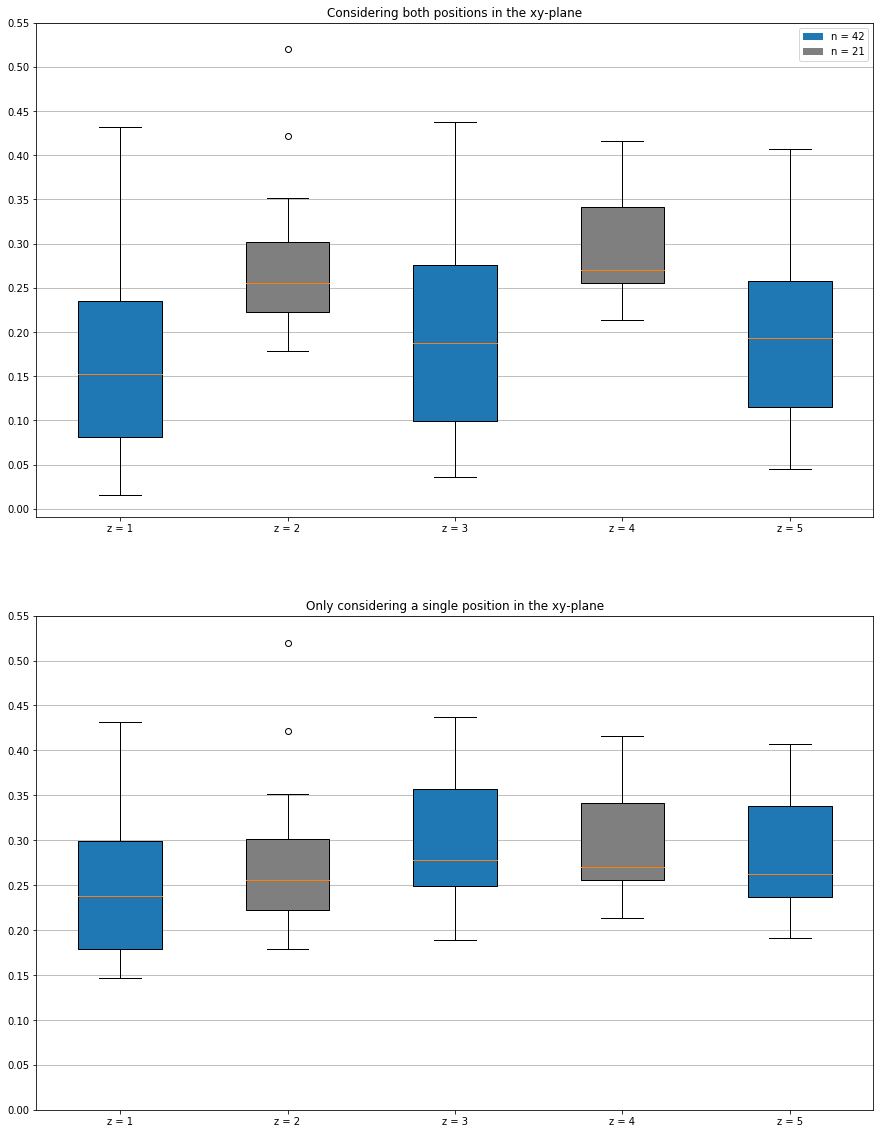

In [93]:
"""
Boxplots showing the variation in diameter of all cylinders with respect to z-height.

Only consider the 'reference specimen' rotated -90 degrees.

"""

# List of characteristics
chars = ['Diameter_Cyl_4mm_Pos',\
        'Diameter_Cyl_8mm_Neg',\
        'Diameter_Cyl_8mm_Pos',\
        'Diameter_Cyl_16mm_Neg',\
        'Diameter_Cyl_16mm_Pos',\
        'Diameter_Cyl_24mm_Neg',\
        'Diameter_Cyl_24mm_Pos']

# List of lables for the boxplots
labels = ['z = 1', 'z = 2', 'z = 3', 'z = 4', 'z = 5']

# Define colors
color1, color2 = 'tab:blue', 'tab:gray'

# Assign colors to boxes
colors = [color1, color2, color1, color2, color1]

# Define legend elements
legend_elements = [Patch(facecolor=color1, label='n = {}'.format(len(chars)*2*3)),\
                  Patch(facecolor=color2, label='n = {}'.format(len(chars)*3))]

# list of handles to the boxes
bplots = []

# Retrieve the characteristics from the dictionary
dfs = func.df_from_dict(chars, char_dict)

# Isolate the specimen rotated -90 degrees
dfs = func.get_single_values('angle', -90, dfs)

# Concatenate dataframes
dfs = pd.concat(dfs)

# Extract columns of interest and converting to absolute values
dfs = dfs[['error', 'z_pos', 'y_pos']]
dfs['error'] = dfs['error'].abs()

# Initiate empty list
data1 = [None] * 5

# Extract the z-layers into separate DataFrame-objects in the list 'data'
for i in range(5):
    data1[i] = dfs[dfs['z_pos'] == i+1]
    data1[i] = data1[i]['error']
    
# Initialize figure as a grid of plots
fig, axs = plt.subplots(nrows=2, figsize=(15, 20))

bplots = [axs[0].boxplot(data1, patch_artist=True, labels=labels)]
axs[0].set_title("Considering both positions in the xy-plane")
axs[0].set_yticks([0, 0.05, .1, .15, .2, .25, .3, .35, .4, .45, .5, .55])
axs[0].yaxis.grid(True)
axs[0].legend(handles=legend_elements, loc='upper right')

dfs = dfs[dfs['y_pos'] != 1]

data2 = [None] * 5

# Extract the z-layers into separate DataFrame-objects in the list 'data'
for i in range(5):
    data2[i] = dfs[dfs['z_pos'] == i+1]
    data2[i] = data2[i]['error']

bplots.append(axs[1].boxplot(data2, patch_artist=True, labels=labels))
axs[1].set_title("Only considering a single position in the xy-plane")
axs[1].set_yticks([0, 0.05, .1, .15, .2, .25, .3, .35, .4, .45, .5, .55])
axs[1].yaxis.grid(True)

# Set color to the boxplots
for bplot in bplots:
    for patch, color in zip(bplot['boxes'], colors):
        patch.set_facecolor(color)

# Display figure
plt.show()

## Flatness

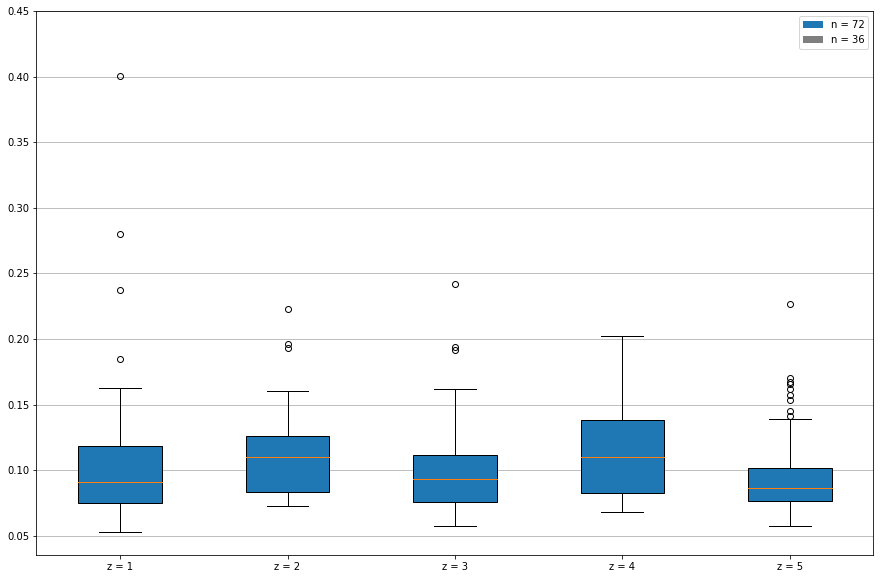

In [89]:
"""
Boxplots showing the variation in flatness of all HX-planes with respect to z-height.

Only consider the 'reference specimen' rotated -90 degrees.

"""

# List of characteristics
chars = ['Flatness_HX1_Plane1',\
        'Flatness_HX1_Plane2',\
        'Flatness_HX1_Plane3',\
        'Flatness_HX1_Plane4',\
        'Flatness_HX1_Plane5',\
        'Flatness_HX1_Plane6',\
        'Flatness_HX2_Plane1',\
        'Flatness_HX2_Plane2',\
        'Flatness_HX2_Plane3',\
        'Flatness_HX2_Plane4',\
        'Flatness_HX2_Plane5',\
        'Flatness_HX2_Plane6']

# List of lables for the boxplots
labels = ['z = 1', 'z = 2', 'z = 3', 'z = 4', 'z = 5']

# Define colors
color1, color2 = 'tab:blue', 'tab:gray'

# Assign colors to boxes
colors = [color1, color2, color1, color2, color1]

# Define legend elements
legend_elements = [Patch(facecolor=color1, label='n = {}'.format(len(chars)*2*3)),\
                  Patch(facecolor=color2, label='n = {}'.format(len(chars)*3))]

# list of handles to the boxes
bplots = []

# Retrieve the characteristics from the dictionary
dfs = func.df_from_dict(chars, char_dict)

# Isolate the specimen rotated -90 degrees
dfs = func.get_single_values('angle', -90, dfs)

# Concatenate dataframes
dfs = pd.concat(dfs)

# Extract columns of interest
dfs = dfs[['error', 'z_pos']]

# Initiate empty list
data = [None] * 5

# Extract the z-layers into separate DataFrame-objects in the list 'data'
for i in range(5):
    data[i] = dfs[dfs['z_pos'] == i+1]
    data[i] = data[i]['error']
    
# Initialize figure
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 10))

bplots = [ax.boxplot(data, patch_artist=True, labels=labels)]
ax.set_yticks([0.05, .1, .15, .2, .25, .3, .35, .4, .45])
ax.yaxis.grid(True)
ax.legend(handles=legend_elements, loc='upper right')

# Set color to the boxplots
for bplot in bplots:
    for patch, color in zip(bplot['boxes'], colors):
        patch.set_facecolor(color)

# Display figure
plt.show()